In [29]:
#importações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('/content/Gapminder.csv', on_bad_lines = 'skip', sep=';')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


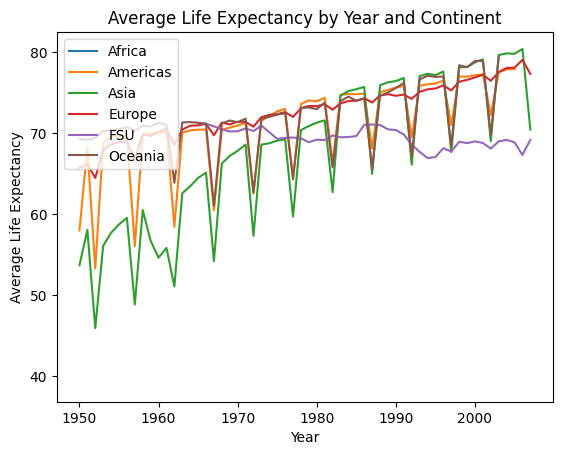

In [2]:
df = df.dropna(subset=['lifeExp'])
avgLife = df.groupby(['year', 'continent'])['lifeExp'].mean().unstack()

fig, ax = plt.subplots()

for continent in avgLife.columns:
    ax.plot(avgLife.index, avgLife[continent].values, label=continent)

ax.set_xlabel('Year')
ax.set_ylabel('Average Life Expectancy')
ax.set_title('Average Life Expectancy by Year and Continent')

ax.legend(loc='upper left')

plt.show()

In [40]:
df = pd.read_excel('/content/AdventureWorks.xlsx')
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [41]:
df['Data Venda'] = pd.to_datetime(df['Data Venda'])
df['Data Venda'] = df['Data Venda'].dt.strftime('%m/%y')

df = df[df['Data Venda'].str.endswith('09')].dropna(subset=['Valor Venda'])

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
11,05/09,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
12,05/09,2009-05-27,306,384,19067,200905163CS746,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
13,05/09,2009-06-12,306,384,19068,200905313CS748,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
14,06/09,2009-07-11,199,384,18959,200906283CS870,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
15,07/09,2009-07-12,306,384,19070,200907083CS757,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


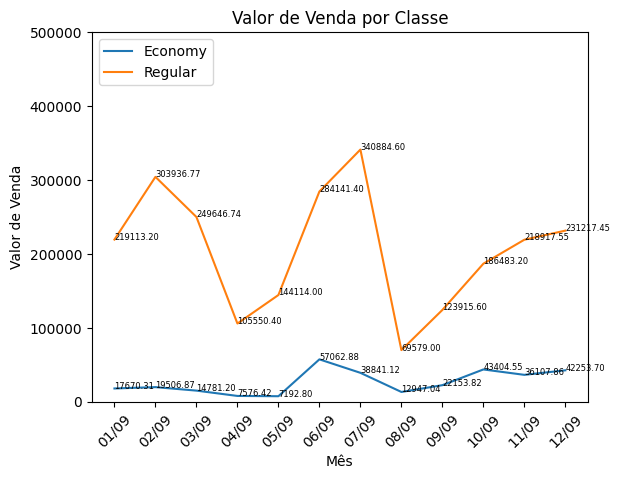

In [36]:
vendaTotal = df.groupby(['Data Venda', 'Classe'])['Valor Venda'].sum().unstack()

fig, ax = plt.subplots()

for classe in vendaTotal.columns:
    ax.plot(vendaTotal.index, vendaTotal[classe].values, label=classe)

ax.set_xlabel('Mês')
ax.set_ylabel('Valor de Venda')
ax.set_title('Valor de Venda por Classe')

plt.xticks(rotation=45)

for i in range(len(vendaTotal.index)):
    x = vendaTotal.index[i]
    y = vendaTotal['Regular'][i]
    label = f'{y:.2f}'
    plt.annotate(label,
                 xy=(x,y),
                 xytext=(0, 0),
                 textcoords='offset points',
                 fontsize=6)

    x = vendaTotal.index[i]
    y = vendaTotal['Economy'][i]
    label = f'{y:.2f}'
    plt.annotate(label,
                 xy=(x,y),
                 xytext=(0, 0),
                 textcoords='offset points',
                 fontsize=6)

ax.legend(loc='upper left')

plt.ylim(0,500000)

plt.show()

In [42]:
df = pd.read_excel('/content/AdventureWorks.xlsx')

df['Data Venda'] = pd.to_datetime(df['Data Venda'])
df['Data Venda'] = df['Data Venda'].dt.strftime('%m/%y')

df = df[df['Data Venda'].str.endswith('08')].dropna(subset=['Valor Venda'])

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,05/08,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,05/08,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,05/08,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,05/08,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,06/08,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


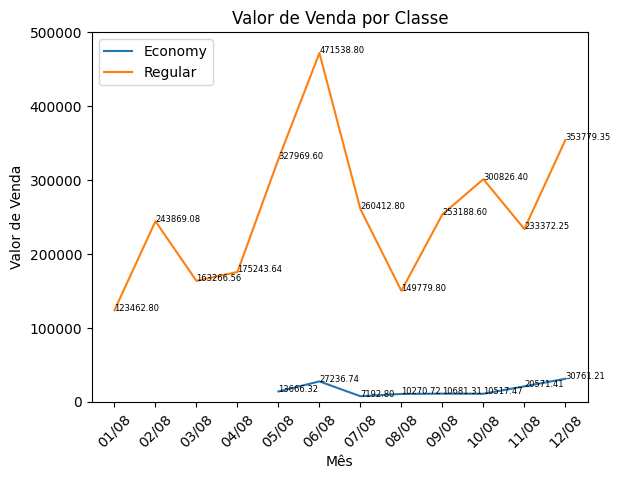

In [38]:
vendaTotal = df.groupby(['Data Venda', 'Classe'])['Valor Venda'].sum().unstack()

fig, ax = plt.subplots()

for classe in vendaTotal.columns:
    ax.plot(vendaTotal.index, vendaTotal[classe].values, label=classe)

ax.set_xlabel('Mês')
ax.set_ylabel('Valor de Venda')
ax.set_title('Valor de Venda por Classe')

plt.xticks(rotation=45)

for i in range(len(vendaTotal.index)):
    x = vendaTotal.index[i]
    y = vendaTotal['Regular'][i]
    label = f'{y:.2f}'
    plt.annotate(label,
                 xy=(x,y),
                 xytext=(0, 0),
                 textcoords='offset points',
                 fontsize=6)

    x = vendaTotal.index[i]
    y = vendaTotal['Economy'][i]
    label = f'{y:.2f}'
    plt.annotate(label,
                 xy=(x,y),
                 xytext=(0, 0),
                 textcoords='offset points',
                 fontsize=6)

ax.legend(loc='upper left')

plt.ylim(0,500000)

plt.show()